# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, recall_score, roc_curve, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from pandas_profiling import profile_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("netflix-rotten-tomatoes-metacritic-imdb.csv")

# 2. Exploring the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [4]:
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


In [5]:
data.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

In [6]:
data.head(5)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [7]:
# dropping unneeded columns
df = data.copy()
df.drop(columns=['Metacritic Score','Production House','Boxoffice','TMDb Trailer',
                 'Trailer Site','Netflix Link','IMDb Link','Image','Tags',
                 'Rotten Tomatoes Score','Poster','Director','Writer','Actors',
                'Release Date','Summary','Languages','Genre','Country Availability',
                'Hidden Gem Score','Netflix Release Date'],inplace=True)

In [8]:
# filling none values with zero, as it means 0 awards
df['Awards Received'].fillna(0,inplace=True)
df['Awards Nominated For'].fillna(0,inplace=True)

In [9]:
# creating new columns
df['Is Nominated'] = df['Awards Nominated For'].apply(lambda x: x != 0)
df['Is Nominated'] = df['Is Nominated'].astype(int)
df['Is Awarded'] = df['Awards Received'].apply(lambda x: x != 0)
df['Is Awarded'] = df['Is Awarded'].astype(int)

In [10]:
# dropping the missing values from View Rating columns
df.dropna(axis=0,subset=['View Rating'],inplace=True)

In [11]:
#df['View Rating'].fillna(df['View Rating'].mode()[0], inplace=True)

In [12]:
df.isna().sum()

Title                    0
Series or Movie          0
Runtime                  1
View Rating              0
IMDb Score              12
Awards Received          0
Awards Nominated For     0
IMDb Votes              12
Is Nominated             0
Is Awarded               0
dtype: int64

In [13]:
# filling the missing values of IMDb Score & IMDb Votes
df['IMDb Score'].fillna(df['IMDb Score'].mean,inplace=True)
df['IMDb Votes'].fillna(df['IMDb Votes'].mean,inplace=True)

# dropping the nulls from Runtime
df.dropna(subset=['Runtime'],inplace=True)

In [14]:
# checking the null values
df.isna().sum()

Title                   0
Series or Movie         0
Runtime                 0
View Rating             0
IMDb Score              0
Awards Received         0
Awards Nominated For    0
IMDb Votes              0
Is Nominated            0
Is Awarded              0
dtype: int64

In [15]:
# fixing the index to use it in the next step with IMDb Votes
df.index = pd.RangeIndex(start=1, stop=1+len(df), step=1)

In [16]:
def get_index(column):
    ctr = 0
    lis = []
    for i,d in enumerate(df[column]) :
        if type(d) != float :
            lis.append(i+1)
            ctr+=1
    print(ctr)
    return lis

In [17]:
ind = get_index('IMDb Votes')

12


In [18]:
print(ind)

[108, 312, 666, 1104, 1117, 1167, 1290, 1981, 2311, 4473, 6374, 7574]


In [19]:
# dropping the index which contains string values in IMDb Votes column
df.drop(ind,inplace=True)
df.index = pd.RangeIndex(start=1, stop=1+len(df), step=1)

In [20]:
# fixing the data type of IMDb Votes & IMDb Score
df['IMDb Votes'] = df['IMDb Votes'].astype('int64')
df['IMDb Score'] = df['IMDb Score'].astype('float')

In [21]:
# checking if the target data are balanced or not
df['Is Awarded'].value_counts()

1    4556
0    3887
Name: Is Awarded, dtype: int64

In [22]:
df.to_csv('cleaned_netflix_data.csv')

# 3. Modeling

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8443 entries, 1 to 8443
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 8443 non-null   object 
 1   Series or Movie       8443 non-null   object 
 2   Runtime               8443 non-null   object 
 3   View Rating           8443 non-null   object 
 4   IMDb Score            8443 non-null   float64
 5   Awards Received       8443 non-null   float64
 6   Awards Nominated For  8443 non-null   float64
 7   IMDb Votes            8443 non-null   int64  
 8   Is Nominated          8443 non-null   int64  
 9   Is Awarded            8443 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 659.7+ KB


In [24]:
selected_fetures = df[['Series or Movie','Runtime','IMDb Score','IMDb Votes',
                       'Awards Nominated For']]
X = pd.get_dummies(selected_fetures, drop_first=False)
X = pd.concat([X,df['View Rating']],axis=1)
y = df.iloc[:,-1:]

In [25]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(X['View Rating'])
X['View Rating'] = encoded

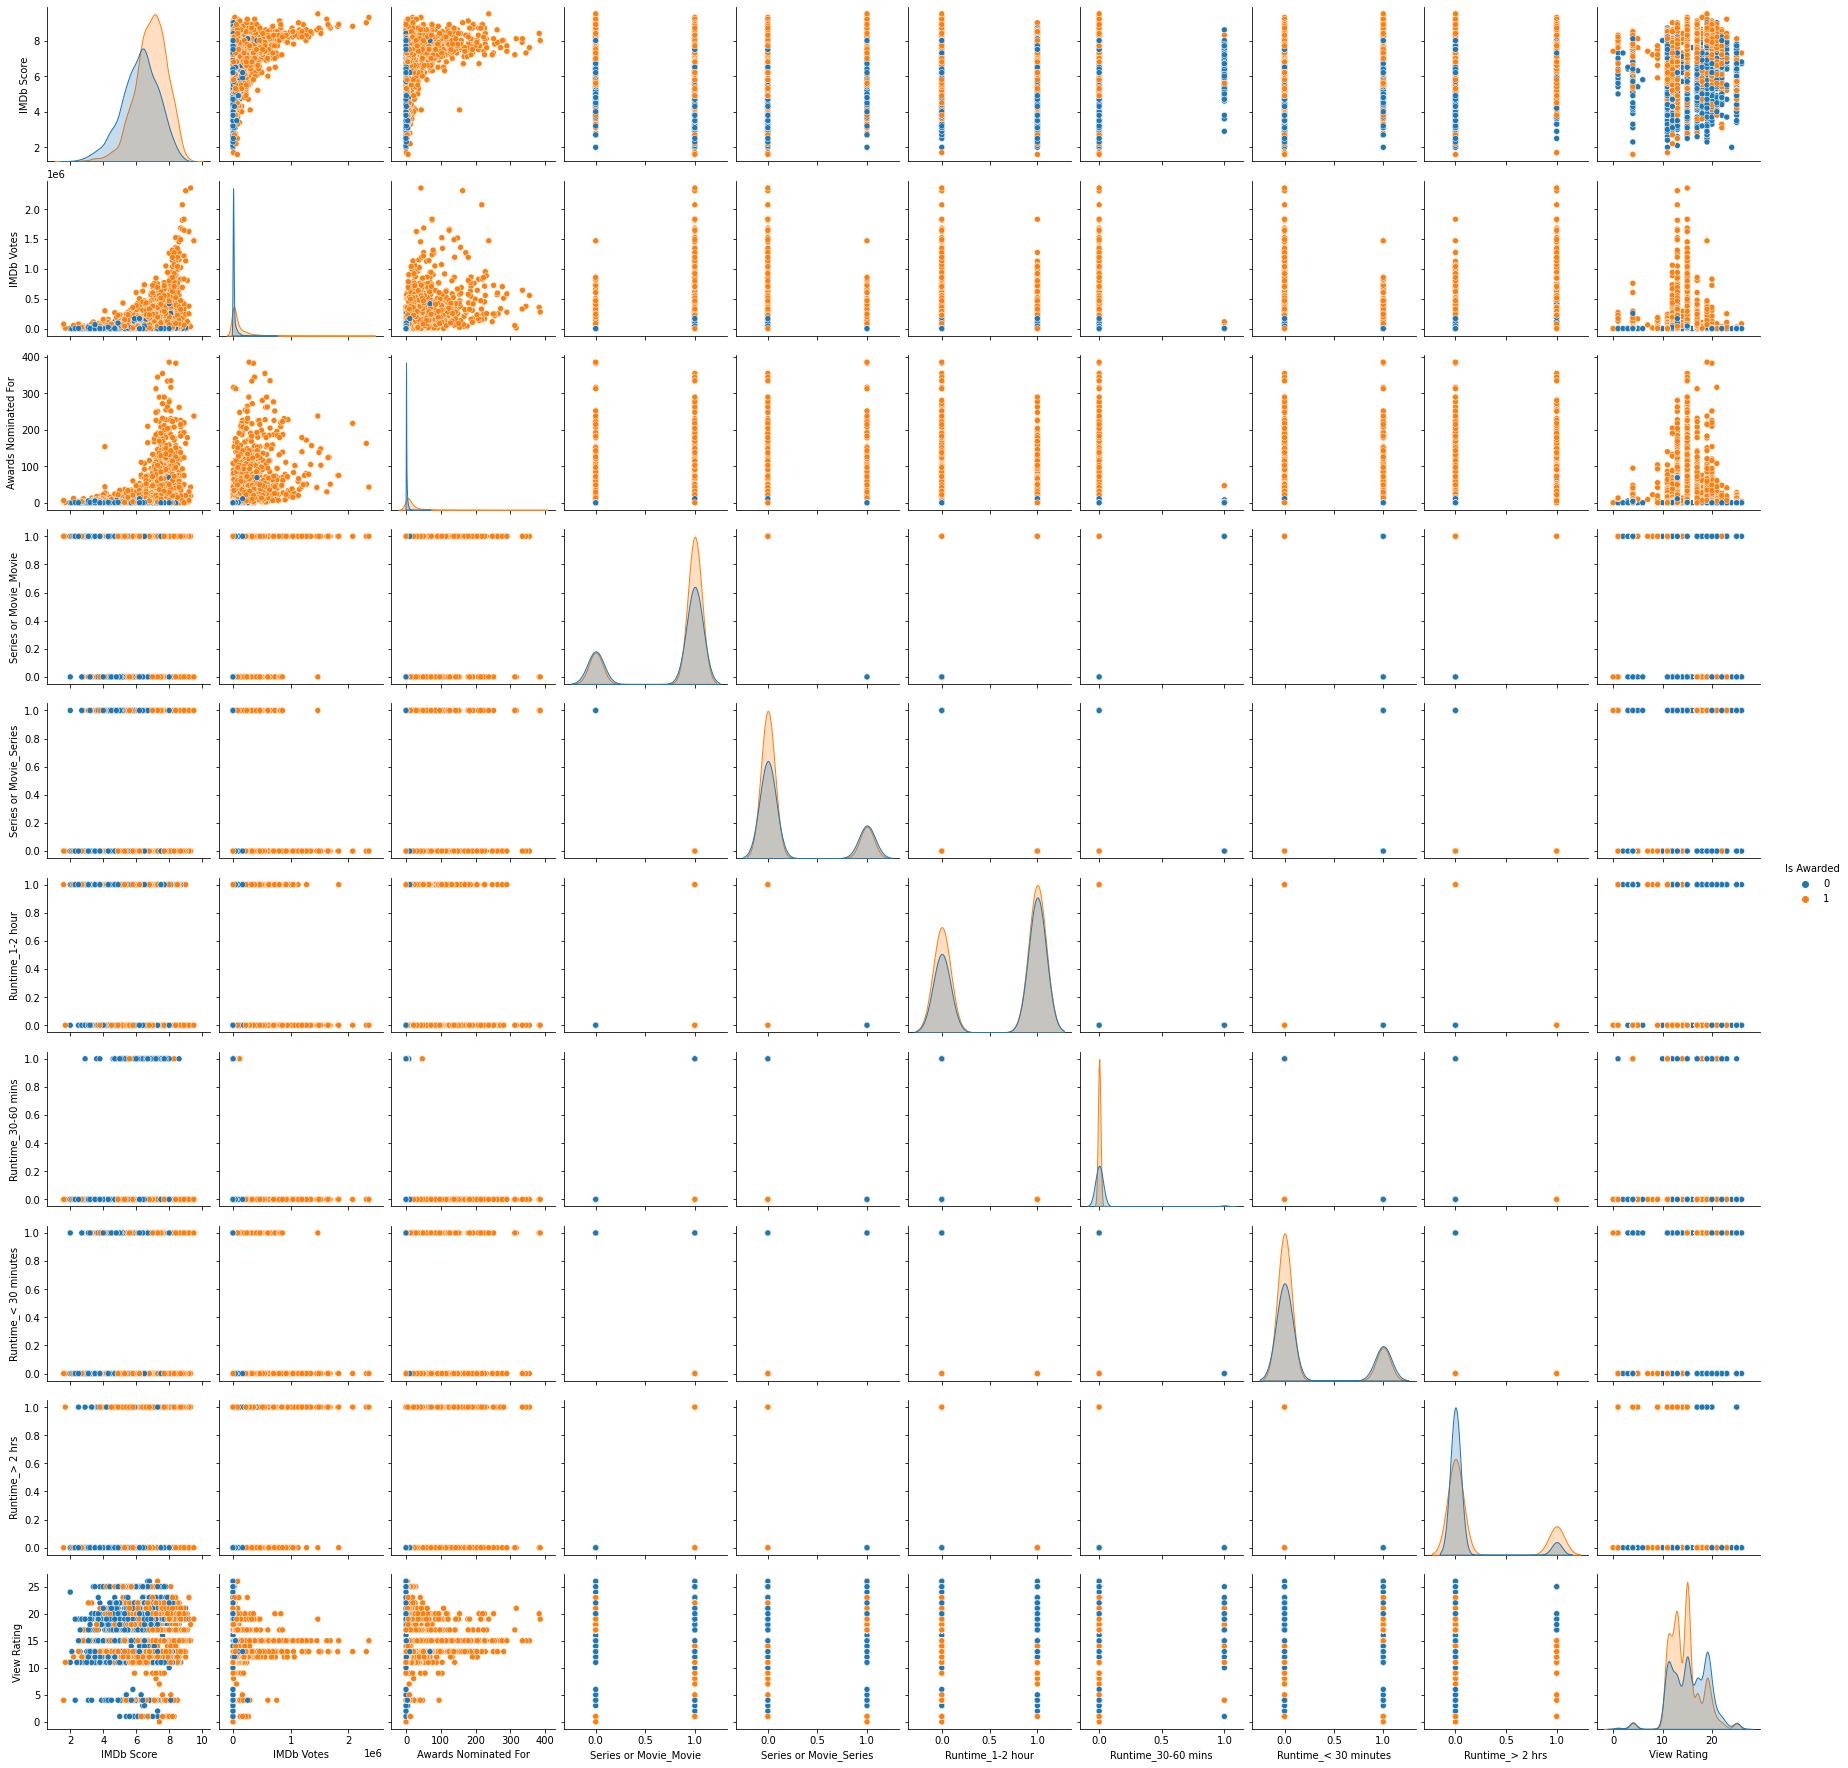

In [26]:
sns.pairplot(pd.concat([X,y],axis=1),hue='Is Awarded')

In [27]:
# create a new dataframe to use it for the pair plot
netflix = pd.concat([X,y],axis=1)

#### Splitting the data

In [28]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train_val, X_test, y_train_val, y_test = X_train_val.reset_index(drop=True),X_test.reset_index(drop=True),y_train_val.reset_index(drop=True),y_test.reset_index(drop=True)

#### Scaling

In [29]:
to_scale = [col for col in X.columns if X[col].max()>1]

sc = StandardScaler()

scaled_train = sc.fit_transform(X_train_val[to_scale])
scaled_train = pd.DataFrame(scaled_train,columns=to_scale)

scaled_test = sc.fit_transform(X_test[to_scale])
scaled_test = pd.DataFrame(scaled_test,columns=to_scale)

#Replace the original columns with the scaled ones
for col in scaled_train:
    X_train_val[col] = scaled_train[col]
    X_test[col] = scaled_test[col]

In [30]:
y_train_val['Is Awarded'].value_counts()

1    3187
0    2723
Name: Is Awarded, dtype: int64

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2,random_state=42)

In [32]:
y_train['Is Awarded'].value_counts()

1    2571
0    2157
Name: Is Awarded, dtype: int64

### 3.1 Baseline Model: K-Nearest Neighbors

In [33]:
# create a dict to store the scores of each model
models_dict = {'Model':[],
              'Accuracy':[],
              'Recall':[],
              'Precision':[],
              'F1 score':[],}

In [34]:
#train the model and validate
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)

print("\nKNN Accuracy=",accuracy_score(y_val, y_pred))
print("KNN F1 score=",f1_score(y_val, y_pred))


KNN Accuracy= 0.7774957698815567
KNN F1 score= 0.7795473595976529


In [35]:
#test the baseline model
test_pred=knn.predict(X_test)
print("\nKNN Accuracy=",accuracy_score(y_test, test_pred))
print("KNN F1 score=",f1_score(y_test, test_pred))


KNN Accuracy= 0.775759968416897
KNN F1 score= 0.7798449612403101


<AxesSubplot:>

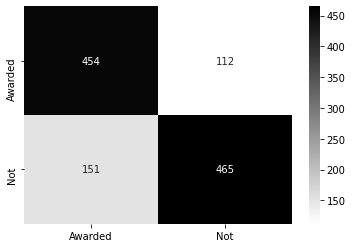

In [36]:
cm = confusion_matrix(y_val, y_pred)
class_label = ["Awarded", "Not"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

In [37]:
# finding the best k
k_range = list(range(1,100))
param_grid = dict(n_neighbors=k_range)
gc = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
gc.fit(X_train_val, y_train_val)
gc.best_params_

{'n_neighbors': 7}

In [38]:
best_knn = KNeighborsClassifier(n_neighbors=7)
best_knn.fit(X_train,y_train)
y_pred = best_knn.predict(X_val)

print("\nKNN Accuracy=",accuracy_score(y_val, y_pred))
print("KNN F1 score=",f1_score(y_val, y_pred))


KNN Accuracy= 0.7859560067681896
KNN F1 score= 0.7875734676742233


In [39]:
y_pred_proba = best_knn.predict_proba(X_val)[::,1]
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_val, y_pred_proba)
knn_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("KNN ")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

<AxesSubplot:>

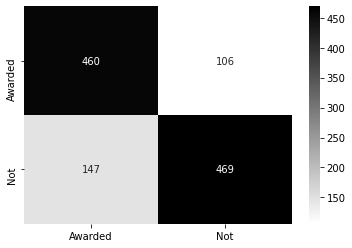

In [40]:
cm = confusion_matrix(y_val, y_pred)
class_label = ["Awarded", "Not"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

### 3.2 Logistic Regression (Not going to help, just to try it)

In [41]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

print("\nLogistic Regression Accuracy=",accuracy_score(y_val, y_pred))
print("Logistic Regression F1 score=",f1_score(y_val, y_pred))


Logistic Regression Accuracy= 0.8003384094754653
Logistic Regression F1 score= 0.7926186291739893


In [42]:
y_pred_proba = lr.predict_proba(X_val)[::,1]
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_val, y_pred_proba)
lr_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Logistic Regression ")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

<AxesSubplot:>

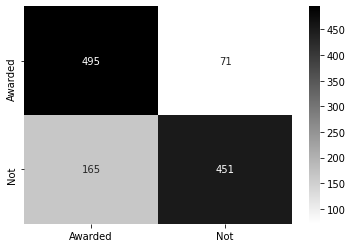

In [43]:
cm = confusion_matrix(y_val, y_pred)
class_label = ["Awarded", "Not"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

### 3.3 Dicision Tree

#### Dicision Tree Tuning

In [44]:
# finding the best parameters for the decision tree
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : list(range(5,20)),
             'max_features': ['auto', 'sqrt', 'log2']}

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid,
                           cv=5, verbose=True, scoring = 'f1')
grid_search.fit(X_train_val, y_train_val)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       random_state=42)


In [45]:
# trying with entropy, since it didn't show in the previose step
tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=8,
                                     max_features='auto',
                                     random_state=42)

tree.fit(X_train,y_train)
y_pred = tree.predict(X_val)

print("DT Accuracy=",accuracy_score(y_val, y_pred))
print("DT F1 score=",f1_score(y_val, y_pred))

DT Accuracy= 0.7901861252115059
DT F1 score= 0.794701986754967


In [46]:
# stroring the best models in the dict
y_pred_proba = tree.predict_proba(X_val)[::,1]
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_val, y_pred_proba)
dt_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Decision Tree")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

<AxesSubplot:>

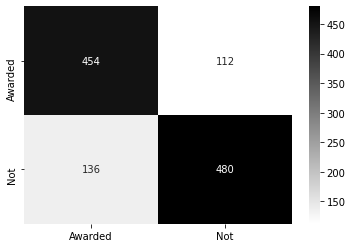

In [47]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["Awarded", "Not"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

### 3.4 Random Forest

In [48]:
# define random_grid for tuning
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [72]:
# Random Forest Tuning
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1)

rf_random.fit(X_train_val, y_train_val)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [70]:
# Random Forest with best hyperparameter
rf_best = RandomForestClassifier(n_estimators=1600,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='sqrt',
                                 max_depth=10,
                                 bootstrap=True)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_val)


print("RF Accuracy=",accuracy_score(y_val, y_pred))
print("RF F1 score=",f1_score(y_val, y_pred))

RF Accuracy= 0.8003384094754653
RF F1 score= 0.8071895424836601


In [50]:
# stroring the best models in the dict
y_pred_proba = rf_best.predict_proba(X_val)[::,1]
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_val, y_pred_proba)
rf_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Random Forest")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

<AxesSubplot:>

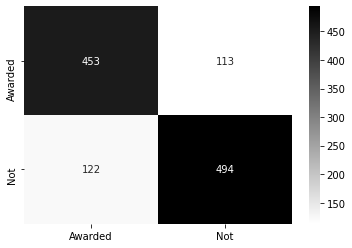

In [51]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["Awarded", "Not"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

### 3.5 XGBoost Classifier

In [52]:
X_train.columns

Index(['IMDb Score', 'IMDb Votes', 'Awards Nominated For',
       'Series or Movie_Movie', 'Series or Movie_Series', 'Runtime_1-2 hour',
       'Runtime_30-60 mins', 'Runtime_< 30 minutes', 'Runtime_> 2 hrs',
       'View Rating'],
      dtype='object')

In [53]:
X_train.rename(columns={"Runtime_< 30 minutes": "Runtime less-than 30 minutes",
                   "Runtime_> 2 hrs": "Runtime greater-than 2 hrs"},inplace=True)
X_val.rename(columns={"Runtime_< 30 minutes": "Runtime less-than 30 minutes",
                   "Runtime_> 2 hrs": "Runtime greater-than 2 hrs"},inplace=True)
X_train_val.rename(columns={"Runtime_< 30 minutes": "Runtime less-than 30 minutes",
                   "Runtime_> 2 hrs": "Runtime greater-than 2 hrs"},inplace=True)
X_test.rename(columns={"Runtime_< 30 minutes": "Runtime less-than 30 minutes",
                   "Runtime_> 2 hrs": "Runtime greater-than 2 hrs"},inplace=True)

In [63]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000],
         'objective': ['binary:logistic']}

xgbc = xgb.XGBClassifier(seed = 20)

rs = RandomizedSearchCV(estimator=xgbc, 
                   param_distributions=params,
                   cv = 5,
                   scoring='f1', 
                   verbose=1,
                    n_iter=25)

rs.fit(X_train_val, y_train_val, eval_metric= 'logloss')
rs.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'subsample': 0.7,
 'objective': 'binary:logistic',
 'n_estimators': 1000,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.4,
 'colsample_bylevel': 0.7}

In [57]:
xgbc = xgb.XGBClassifier(subsample=0.7,
                         objective='binary:logistic',
                         n_estimators=100,
                         max_depth=3,
                        learning_rate=0.1,
                        colsample_bytree=0.4,
                        colsample_bylevel=0.7
                        )

xgbc.fit(X_train,y_train,eval_metric= 'logloss')
y_pred = xgbc.predict(X_val)

print("xgbc Accuracy=",accuracy_score(y_val, y_pred))
print("xgbc F1 score=",f1_score(y_val, y_pred))

xgbc Accuracy= 0.8003384094754653
xgbc F1 score= 0.8071895424836601


In [58]:
# stroring the best models in the dict
y_pred_proba = xgbc.predict_proba(X_val)[::,1]
xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_val, y_pred_proba)
xgb_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("XGBoost Classifier ")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

### 3.6 Ensembling with staking 

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
 
estimators = [
     ('rf', RandomForestClassifier(n_estimators=1600,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='sqrt',
                                 max_depth=10,
                                 bootstrap=True)),
    ('xgb', xgb.XGBClassifier(subsample=0.7,
                         objective='binary:logistic',
                         n_estimators=100,
                         max_depth=3,
                        learning_rate=0.1,
                        colsample_bytree=0.79,
                        colsample_bylevel=0.79
                        ))
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2,random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print("SC Accuracy=",accuracy_score(y_val, y_pred))
print("SC F1 score=",f1_score(y_val, y_pred))


[12:36:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

In [60]:
models_dict['Model'].append("StackingClassifier")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

# 4. Evaluating

In [61]:
# conver the dict into dataframe for visualizations
result = pd.DataFrame.from_dict(models_dict)
result

,Model,Accuracy,Recall,Precision,F1 score
0,KNN,0.785956,0.761364,0.815652,0.787573
1,Logistic Regression,0.800338,0.732143,0.863985,0.792619
2,Decision Tree,0.790186,0.779221,0.810811,0.794702
3,Random Forest,0.801184,0.801948,0.813839,0.807850
4,XGBoost Classifier,0.800338,0.801948,0.812500,0.807190
5,StackingClassifier,0.797800,0.810065,0.803543,0.806791


In [64]:
y_train_val

,Is Awarded
0,1
1,0
2,1
3,0
4,1
...,...
5905,1
5906,1
5907,1
5908,0


In [71]:
# Random Forest with best hyperparameter
rf_best = RandomForestClassifier(n_estimators=1600,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='sqrt',
                                 max_depth=10,
                                 bootstrap=True)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)


print("RF Accuracy=",accuracy_score(y_test, y_pred))
print("RF F1 score=",f1_score(y_test, y_pred))

RF Accuracy= 0.5395547134059687
RF F1 score= 0.7009230769230769


In [111]:
result.to_csv('MVP_Scores.csv')

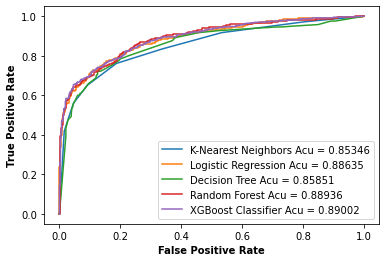

In [112]:
# plotting the ROC curve
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors Acu = {:0.5f}'.format(knn_roc_auc))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Acu = {:0.5f}'.format(lr_roc_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree Acu = {:0.5f}'.format(dt_roc_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Acu = {:0.5f}'.format(rf_roc_auc))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Acu = {:0.5f}'.format(xgb_roc_auc))


plt.legend()
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold');